In [1]:
### species present
sp_list_provided = ["Ea","Pa","Pch","Pci","Pf","Pp","Pv","Sm"] 
from itertools import permutations, combinations
import math
listl = list(combinations(sp_list_provided, 2))
listl3 = list(combinations(sp_list_provided, 3))
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
filename1 = "trio_lastTransfer.xlsx"
filename2 = "pair_timeSeries.xlsx"
filename3 = "7and8Species_lastTransfer.xlsx"
filename4 = "monoculture_timeSeries.xlsx"
sheet_to_df_map = pd.read_excel(r"C:\Users\shrey\microbial-ecology\datasets\Friedman_2017_data\data/"+str(filename2), sheet_name=None)
sheet3_to_df_map = pd.read_excel(r"C:\Users\shrey\microbial-ecology\datasets\Friedman_2017_data\data/"+str(filename1), sheet_name=None)
sheet78 = pd.read_excel(r"C:\Users\shrey\microbial-ecology\datasets\Friedman_2017_data/data/"+str(filename3), sheet_name=None);
sheetmono = pd.read_excel(r"C:\Users\shrey\microbial-ecology\datasets\Friedman_2017_data/data/"+str(filename4), sheet_name=None);
sheet78["all_species"]["transfer"] = sheet78["all_species"]['Unnamed: 0'].values
comm_all = sheet78["all_species"]
abun8_sst = comm_all[comm_all["transfer"]==5.0][sp_list_provided][:15].mean().values

In [3]:
len(sheet_to_df_map["Ea_Pa"])

13

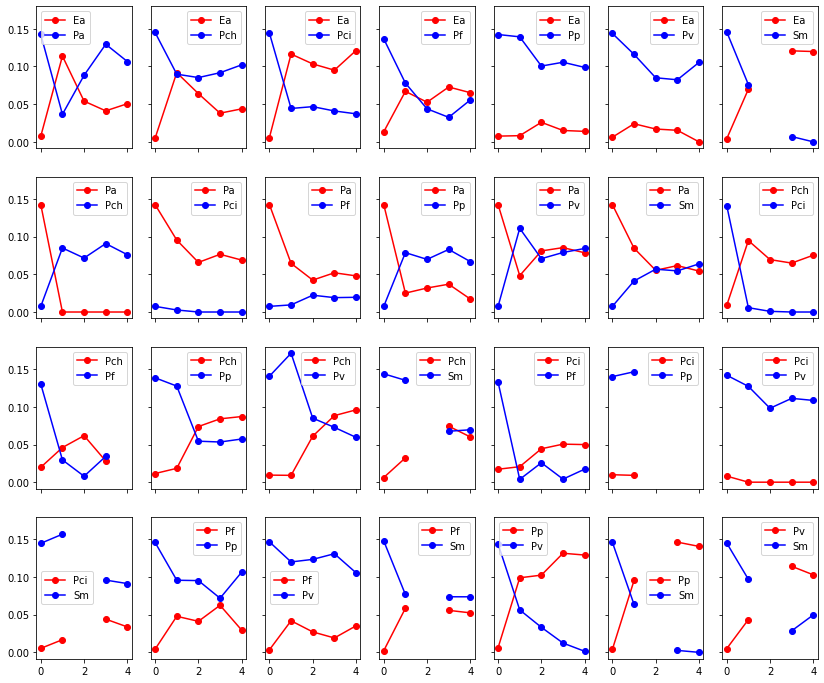

In [4]:
sheet_to_df_map;
npairs = math.comb(8,2)
fig,ax = plt.subplots(4,7,figsize=(14,12),sharex=True,sharey=True)
for i in range(npairs):
    sp1 = listl[i][0]
    sp2 = listl[i][1]
    plt.subplot(4,7,i+1)
    plt.plot(sheet_to_df_map[listl[i][0]+"_"+listl[i][1]][listl[i][0]][:5],"-or",label=str(listl[i][0]))
    plt.plot(sheet_to_df_map[listl[i][0]+"_"+listl[i][1]][listl[i][1]][:5],"-ob",label=str(listl[i][1]))
    plt.legend()

In [5]:
pair_comm = [] 
npairs = math.comb(8,2)
for i in range(npairs):
    sp1 = listl[i][0]
    sp2 = listl[i][1]
    #meanpairs = [sheet_to_df_map[listl[i][0]+"_"+listl[i][1]].T[5][1:].values,sheet_to_df_map[listl[i][0]+"_"+listl[i][1]].T[12][1:].values]
    #pair_comm.append([[pd.DataFrame(pd.DataFrame(meanpairs).T.mean().values)[0].values[0],sp1],[pd.DataFrame(pd.DataFrame(meanpairs).T.mean().values)[0].values[1],sp2]])
    check = sheet_to_df_map[sp1+"_"+sp2]
    check["transfer"] = check['Unnamed: 0'].values
    check[check["transfer"]==5.0]
    pair_comm.append([[check[check["transfer"]==5.0][sp1].mean(),sp1],[check[check["transfer"]==5.0][sp2].mean(),sp2]])

In [32]:
pair_commREL = [] 
npairs = math.comb(8,2)
for i in range(npairs):
    sp1 = listl[i][0]
    sp2 = listl[i][1]
    check = sheet_to_df_map[sp1+"_"+sp2]
    check["transfer"] = check['Unnamed: 0'].values
    chdf = check[check["transfer"]==5.0]
    chdf["tot"] = check[check["transfer"]==5.0][[sp1,sp2]].T.sum()
    chdf2 = chdf.copy()
    for ff in [sp1,sp2]:
        chdf2[ff] = chdf[ff]/chdf["tot"]
    pair_commREL.append([[chdf2[sp1].mean(),sp1],[chdf2[sp2].mean(),sp2]])


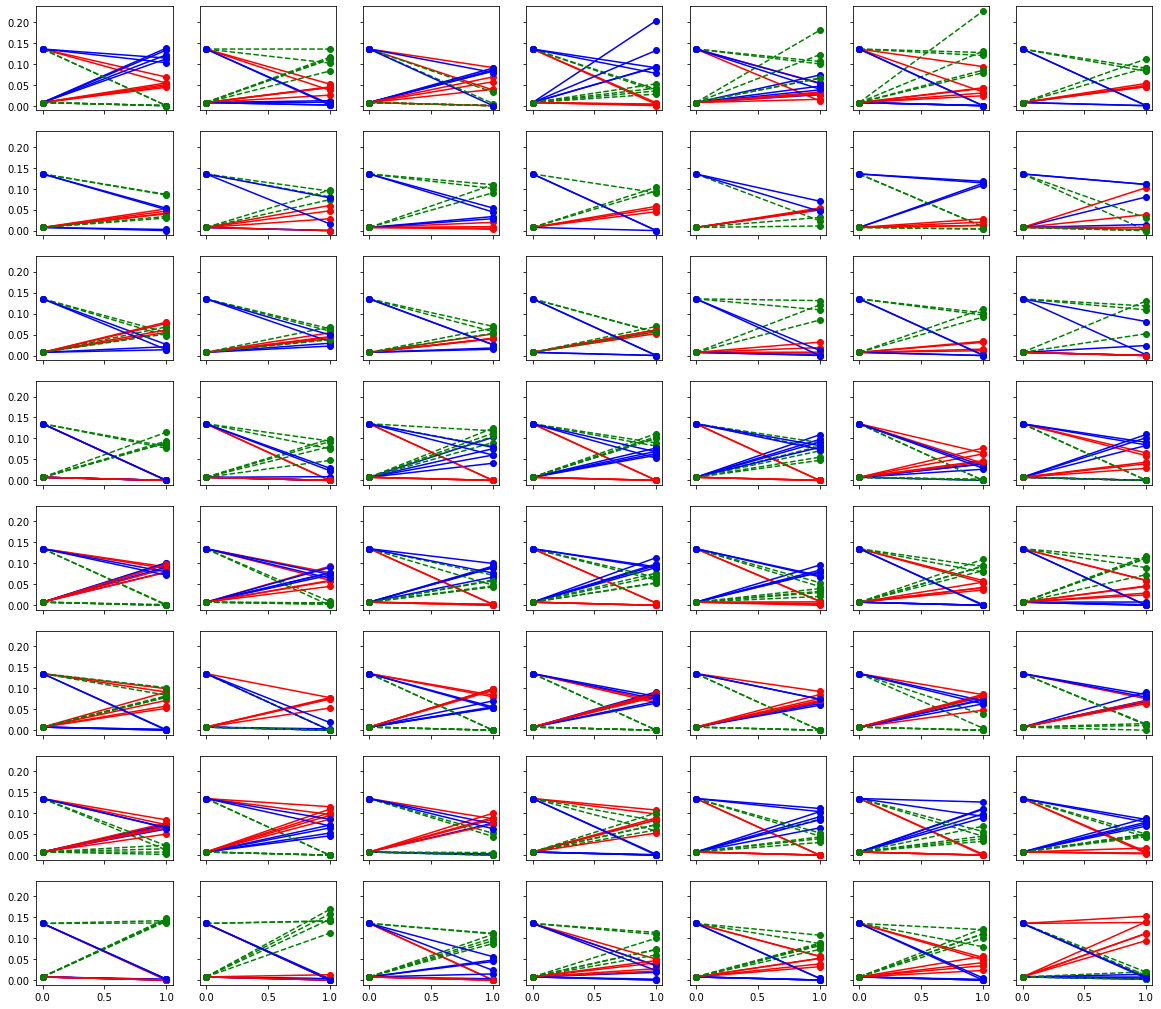

In [15]:
tri_comm = []
ntriads = math.comb(8,3)
tri_time_series = [] 
fig,ax =  plt.subplots(8,7,figsize=(20,18),sharex=True,sharey=True)
for i in range(ntriads):
    sp1 = listl3[i][0]
    sp2 = listl3[i][1]
    sp3 = listl3[i][2]
    plt.subplot(8,7,i+1)
    sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"] = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]['Unnamed: 0'].values
    check = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]
    for j in range(int(len(list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index)))/2)):
        toplot = list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index))[2*j:2*(j+1)]
        plt.plot(sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3].T[toplot].T[sp1].values,"-or")
        plt.plot(sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3].T[toplot].T[sp2].values,"--og")
        plt.plot(sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3].T[toplot].T[sp3].values,"-ob",label=sp1+"_"+sp2+"_"+sp3)
    avg = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3][sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"]==5.0][[sp1,sp2,sp3]].mean().values
    tri_time_series.append([sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3][sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"]==0.0][[sp1,sp2,sp3]],sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3][sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"]==5.0][[sp1,sp2,sp3]]])
    tri_comm.append([[avg[0],sp1],[avg[1],sp2],[avg[2],sp3]])

In [66]:
tri_commREL = []
ntriads = math.comb(8,3)
tri_time_series = [] 
#fig,ax =  plt.subplots(8,7,figsize=(20,18),sharex=True,sharey=True)
for i in range(ntriads):
    sp1 = listl3[i][0]
    sp2 = listl3[i][1]
    sp3 = listl3[i][2]
    #plt.subplot(8,7,i+1)
    sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"] = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]['Unnamed: 0'].values
    check = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]
    chdf = sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3][sheet3_to_df_map[sp1+"_"+sp2+"_"+sp3]["transfer"]==5.0]
    chdf["tot"] = check[check["transfer"]==5.0][[sp1,sp2,sp3]].T.sum()
    chdf2 = chdf.copy()
    for ff in [sp1,sp2,sp3]:
            chdf2[ff] = chdf[ff]/chdf["tot"]
    tri_commREL.append([[chdf2[sp1].mean(),sp1],[chdf2[sp2].mean(),sp2],[chdf2[sp3].mean(),sp3]])

In [68]:
colors = sns.color_palette("gnuplot",8)

In [69]:
colors = ["blue", "red", "green", "black", "yellow","purple","salmon","coral"]

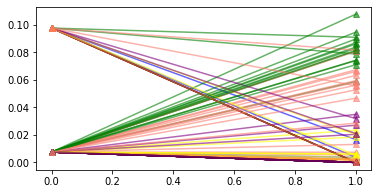

In [71]:
check = sheet78["all_species"]
plt.figure(figsize=(6,3))
list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index))
for j in range(int(len(list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index)))/2)):
        toplot = list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index))[2*j:2*(j+1)]
        for sp in sp_list_provided:
            plt.plot(check.T[toplot].T[sp].values,color=colors[sp_list_provided.index(sp)],marker="^",alpha=0.6)

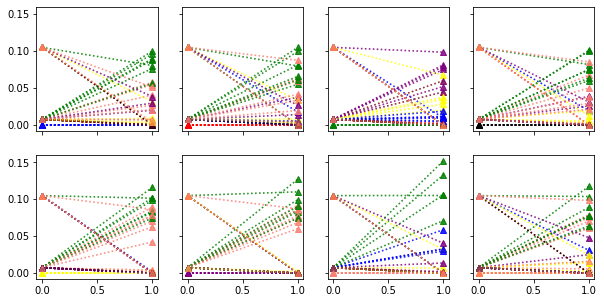

In [72]:
leaveonecomms = [] 
fig,ax = plt.subplots(2,4,figsize=(10,5),sharex = True, sharey = True)
for species in sp_list_provided:
    sheet_leaveone = sheet78["-"+species]
    zerovals = np.zeros((len(sheet_leaveone),1))
    sheet_leaveone[species] = zerovals
    sheet_leaveone["transfer"] = sheet_leaveone['Unnamed: 0'].values
    check = sheet_leaveone
    plt.subplot(2,4,sp_list_provided.index(species)+1)
    for j in range(int(len(list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index)))/2)):
        toplot = list(set(list(check.index)).difference(check[check["transfer"].isna()==True].index))[2*j:2*(j+1)]
        for sp in sp_list_provided:
             plt.plot(check.T[toplot].T[sp].values,color=colors[sp_list_provided.index(sp)],marker="^",alpha=0.6,linestyle="dotted")
    leaveonecomms.append(sheet_leaveone[sheet_leaveone["transfer"]==5.0][sp_list_provided].mean().values)

In [96]:
leaveonecommsREL = [] 
#fig,ax = plt.subplots(2,4,figsize=(10,5),sharex = True, sharey = True)
for species in sp_list_provided:
    sheet_leaveone = sheet78["-"+species]
    zerovals = np.zeros((len(sheet_leaveone),1))
    sheet_leaveone[species] = zerovals
    sheet_leaveone["transfer"] = sheet_leaveone['Unnamed: 0'].values
    chdf = sheet_leaveone[sheet_leaveone["transfer"]==5.0][sp_list_provided]
    chdf["tot"] = chdf.T.sum()
    chdf2 = chdf.copy()
    for i in sp_list_provided:
        chdf2[i] = chdf[i]/chdf["tot"]
    leaveonecommsREL.append(chdf2[sp_list_provided].mean().values)

In [101]:
mono_data = []
for species in sp_list_provided:
    mono_data.append(sheetmono[species].T[5][1:].mean())

In [108]:
mono_dataREL = list(np.ones((8,1)).ravel())

In [109]:
mono_well = [] 
for species in range(8):
    mono_well.append(2**species)

In [110]:
pair_well = [] 
for species in listl:
    sp1 = species[0]
    sp2 = species[1]
    spn1 = sp_list_provided.index(sp1)
    spn2 = sp_list_provided.index(sp2)
    pair_well.append(2**spn1 + 2**spn2)

In [111]:
tri_well = []
for i in range(ntriads):
    sp1 = listl3[i][0]
    sp2 = listl3[i][1]
    sp3 = listl3[i][2]
    spn1 = sp_list_provided.index(sp1)
    spn2 = sp_list_provided.index(sp2)
    spn3 = sp_list_provided.index(sp3)
    tri_well.append(2**spn1 + 2**spn2 + 2**spn3)

In [112]:
leaveoneoutwell = []
for i in range(8):
    leaveoneoutwell.append(2**8-2**i-1)

In [113]:
tridf = pd.DataFrame(tri_comm)
tridf["well index"] = tri_well

In [114]:
pairdf = pd.DataFrame(pair_comm)

In [115]:
pairdf["well index"] = pair_well

In [116]:
abun_mat = pd.DataFrame(np.zeros((2**8,8)),columns = sp_list_provided)
abun_mat["well index"] = abun_mat.index

In [117]:
for widx in pairdf["well index"].values:
    sp = pairdf[pairdf["well index"]==widx].T.values[0][0][1]
    abun_mat[sp][widx] = pairdf[pairdf["well index"]==widx].T.values[0][0][0]
    sp = pairdf[pairdf["well index"]==widx].T.values[1][0][1]
    abun_mat[sp][widx] = pairdf[pairdf["well index"]==widx].T.values[1][0][0]

In [118]:
for widx in tridf["well index"].values:
    sp = tridf[tridf["well index"]==widx].T.values[0][0][1]
    abun_mat[sp][widx] = tridf[tridf["well index"]==widx].T.values[0][0][0]
    sp = tridf[tridf["well index"]==widx].T.values[1][0][1]
    abun_mat[sp][widx] = tridf[tridf["well index"]==widx].T.values[1][0][0]
    sp = tridf[tridf["well index"]==widx].T.values[2][0][1]
    abun_mat[sp][widx] = tridf[tridf["well index"]==widx].T.values[2][0][0]

In [119]:
monodf = pd.DataFrame(mono_data)
monodf["well index"] = mono_well

In [120]:
monodf.index = sp_list_provided

In [121]:
for widx in mono_well:
    sp = monodf[monodf["well index"]==widx].index[0]
    abun_mat[sp][widx] = monodf[monodf["well index"]==widx][0].values[0]

In [122]:
leave1 = pd.DataFrame(leaveonecomms)
leave1["well index"] = leaveoneoutwell

In [123]:
indx = 0 
for idx in leaveoneoutwell :
    df3 = leave1[leave1["well index"]==idx].T[indx]
    for sp in sp_list_provided:
        abun_mat[sp][idx] = leave1[leave1["well index"]==idx].T[indx][sp_list_provided.index(sp)]
    indx = indx + 1

In [124]:
for sp in sp_list_provided:
    abun_mat[sp][255] = abun8_sst[sp_list_provided.index(sp)]

In [125]:
df = abun_mat
abun_mat

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm,well index
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,0.132874,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.071454,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2
3,0.049707,0.112683,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3
4,0.000000,0.000000,0.081540,0.0,0.000000,0.000000,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...
251,0.009825,0.000190,0.000000,0.0,0.041640,0.070024,0.000573,0.000000,251
252,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,252
253,0.003276,0.000000,0.078137,0.0,0.007367,0.011696,0.043815,0.000000,253
254,0.000000,0.000000,0.083739,0.0,0.006503,0.012542,0.036950,0.001757,254


In [413]:
pd.to_pickle(abun_mat,"Friedman-data-sst-rel.pkl")

In [90]:
import pandas as pd
pd.read_pickle("Friedman-data-sst-rel.pkl")

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm,well index
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,0.132874,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.071454,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2
3,0.069330,0.093060,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3
4,0.000000,0.000000,0.081540,0.0,0.000000,0.000000,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...
251,0.009825,0.000190,0.000000,0.0,0.041640,0.070024,0.000573,0.000000,251
252,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,252
253,0.003276,0.000000,0.078137,0.0,0.007367,0.011696,0.043815,0.000000,253
254,0.000000,0.000000,0.083739,0.0,0.006503,0.012542,0.036950,0.001757,254


In [100]:
ab = itertools.chain(mono_well, pair_well,tri_well, leaveoneoutwell)
list_present = list(ab)
list_present.append(255)
pd.to_pickle(list_present,"list-present-friedman.pkl")

In [101]:
struct_list = itertools.chain(mono_well, pair_well,tri_well)

In [103]:
pd.to_pickle(list(struct_list),"Friedman-mopatri.pkl")

In [112]:
predicts = leaveoneoutwell.copy()
predicts.append(255)

In [113]:
pd.to_pickle(list(predicts),"Friedman-outsample-mopatri.pkl")

In [114]:
predicts

[254, 253, 251, 247, 239, 223, 191, 127, 255]

In [120]:
### prepare datasets for EPICS 

In [165]:
epics_mono = pd.DataFrame(mono_data)*1000
epics_mono[0].values

array([132.87375,  71.45375,  81.54   ,   3.61625,  55.42625, 147.3225 ,
       106.3125 , 149.63375])

In [124]:
mono_epics = []
for i in range(8):
    mono_epics.append([mono_data[i]])

In [127]:
mono_epics

[[0.13287375],
 [0.07145375],
 [0.08154],
 [0.003616249999999995],
 [0.055426249999999996],
 [0.14732250000000002],
 [0.1063125],
 [0.14963375]]

In [132]:
leaveonecomms

[array([0.        , 0.        , 0.08373884, 0.        , 0.00650346,
        0.01254203, 0.03694998, 0.00175712]),
 array([0.00327581, 0.        , 0.07813683, 0.        , 0.00736743,
        0.01169626, 0.04381509, 0.        ]),
 array([0.00982481, 0.00019024, 0.        , 0.        , 0.04163995,
        0.07002446, 0.00057339, 0.        ]),
 array([0.00275252, 0.        , 0.07938566, 0.        , 0.00579538,
        0.0136213 , 0.0418389 , 0.00026052]),
 array([0.00025129, 0.        , 0.09422073, 0.        , 0.        ,
        0.        , 0.07245453, 0.00095346]),
 array([0.        , 0.        , 0.0958599 , 0.        , 0.00058992,
        0.        , 0.07792304, 0.        ]),
 array([0.0256795 , 0.        , 0.09456949, 0.        , 0.00652331,
        0.00933774, 0.        , 0.00032162]),
 array([0.0044181 , 0.        , 0.08445827, 0.        , 0.00806436,
        0.01044685, 0.058061  , 0.        ])]

In [418]:
abun_mat.T[mono_well].T

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm,well index
1,0.132874,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.000000,0.071454,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
4,0.000000,0.000000,0.08154,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
8,0.000000,0.000000,0.00000,0.003616,0.000000,0.000000,0.000000,0.000000,8.0
16,0.000000,0.000000,0.00000,0.000000,0.055426,0.000000,0.000000,0.000000,16.0
32,0.000000,0.000000,0.00000,0.000000,0.000000,0.147323,0.000000,0.000000,32.0
64,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.106313,0.000000,64.0
128,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.149634,128.0


In [323]:
A

NameError: name 'A' is not defined